# Cancer Cell Classification using Support Vector Machine

We will use SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics.

In [2]:
#import dataset
df=pd.read_csv("G:\Data science\Datasets\cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


    The fields in each record are:
        Field name -Description
        ID- Identification number
        Clump-Clump thickness
        UnifSize-Uniformity of cell size
        UnifShape-Uniformity of cell shape
        MargAdh-Marginal adhesion
        SingEpiSize-Single epithelial cell size
        BareNuc-Bare nuclei
        BlandChrom-Bland chromatin
        NormNucl-Normal nucleoli
        Mit-Mitoses
        Class-Benign or malignant


The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [17]:
#general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [41]:
#statistical Analysis
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


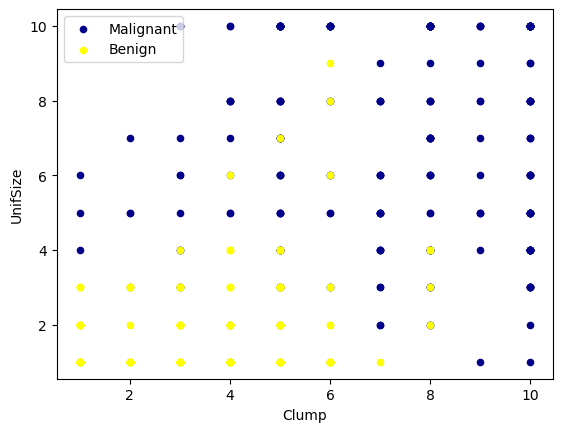

In [15]:
#distribution of classes
ax=df[df['Class']==4].plot(kind='scatter',x='Clump',y='UnifSize',color='Darkblue',label='Malignant');
df[df['Class']==2].plot(kind='scatter',x='Clump',y='UnifSize',color='Yellow',label='Benign',ax=ax);
plt.legend(loc='upper left')

In [25]:
#data preprocessing
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int64')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [27]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

## SVM

In [30]:
x=np.asarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [31]:
y=np.asarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [32]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [33]:
#modeling
from sklearn import svm
cls=svm.SVC(kernel='rbf').fit(x_train,y_train)

In [34]:
#prediction
y_hat=cls.predict(x_test)

In [35]:
#evaluation
from sklearn.metrics import confusion_matrix,classification_report,jaccard_score

In [37]:
confusion_matrix(y_test,y_hat,labels=[2,4])

array([[85,  5],
       [ 0, 47]], dtype=int64)

Out of 90 benign values, our model has predicted 85 as benign and 5 as malignant and out of 47 malignant values , our model has predicted all 47 as malignant.

In [39]:
jaccard_score(y_test,y_hat,pos_label=2)

0.9444444444444444

In [40]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



### Test case

Lets consider a cell record of a person A with 'Clump'=4, 'UnifSize'=3, 'UnifShape'=3, 'MargAdh'=2, 'SingEpiSize'=3,'BareNuc'=3, 'BlandChrom'=3, 'NormNucl'=2, 'Mit'=1 and predict his diagnosis.

In [42]:
A=[[4,3,3,2,3,3,3,2,1]]
pred=cls.predict(A)
pred

array([2], dtype=int64)

Thus the person A with above Charecteristics will be benign.